Library

In [830]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network._multilayer_perceptron import MLPClassifier


# Read Data, EDA And Preprocessing

In [831]:
df = pd.read_csv("dataset.csv")
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [832]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [833]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [834]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


In [835]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [836]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<Axes: >

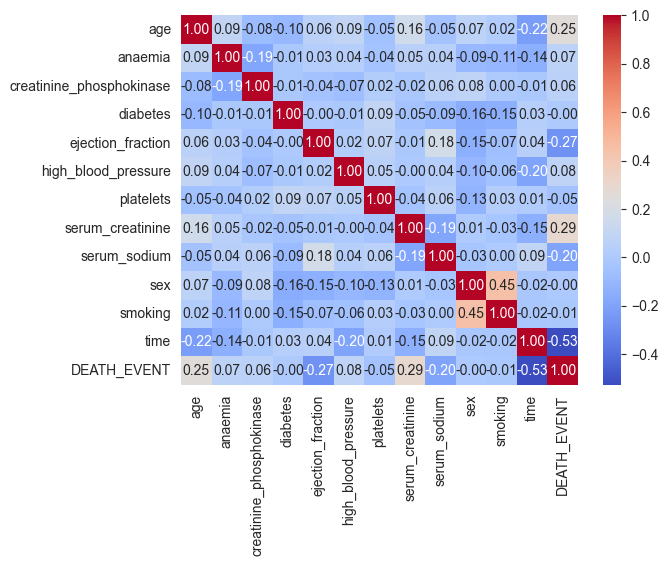

In [837]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [838]:
y = df['DEATH_EVENT']

In [839]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<Axes: xlabel='anaemia', ylabel='DEATH_EVENT'>

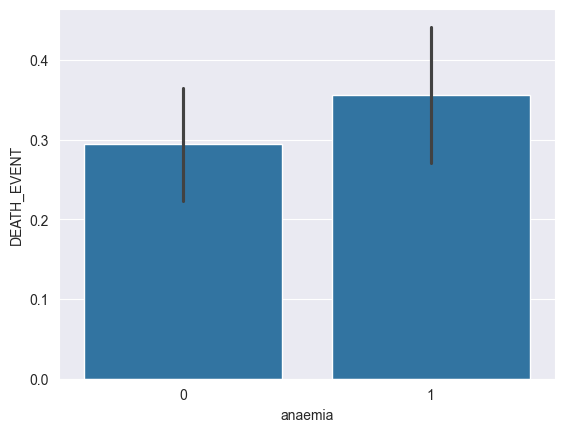

In [840]:
sns.barplot(x=df['anaemia'],y=y)

<Axes: xlabel='age', ylabel='DEATH_EVENT'>

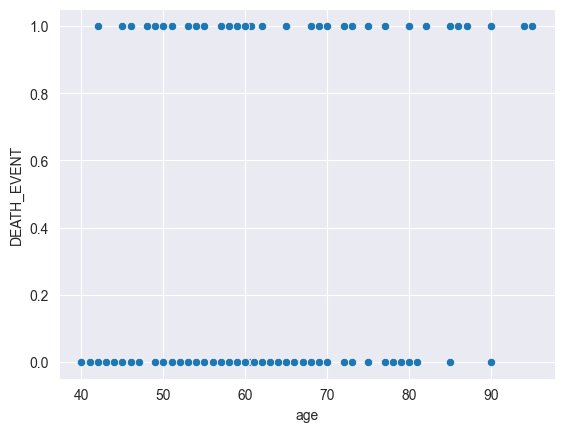

In [841]:
sns.scatterplot(x=df['age'],y=y)

C:\Users\User\AppData\Local\Temp\ipykernel_28372\2893847880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DEATH_EVENT'])


<Axes: xlabel='DEATH_EVENT', ylabel='Density'>

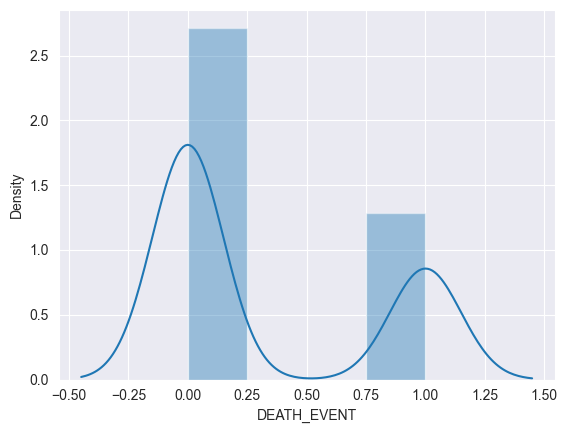

In [842]:
sns.distplot(df['DEATH_EVENT'])

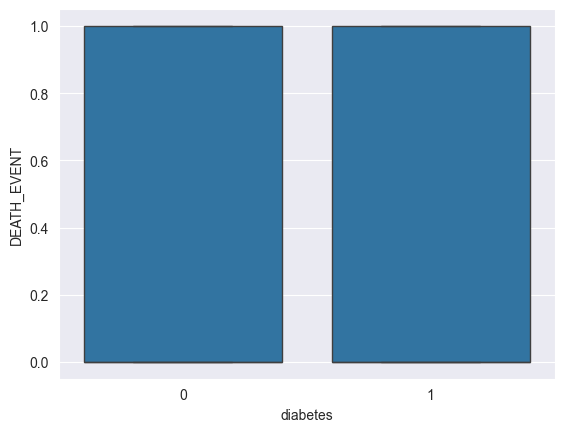

In [843]:
sns.boxplot(x=df['diabetes'],y=y,data=df)
plt.show()

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

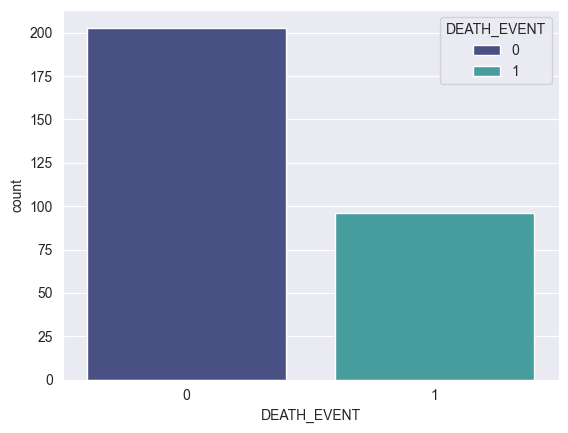

In [844]:
sns.countplot(x=df['DEATH_EVENT'],data=df,hue="DEATH_EVENT",palette="mako")

<Axes: xlabel='ejection_fraction', ylabel='age'>

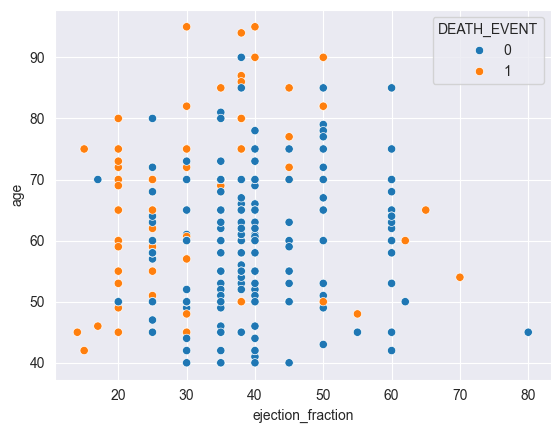

In [845]:
sns.scatterplot(x=df['ejection_fraction'],y=df['age'],hue="DEATH_EVENT",data=df)

<Axes: xlabel='sex', ylabel='time'>

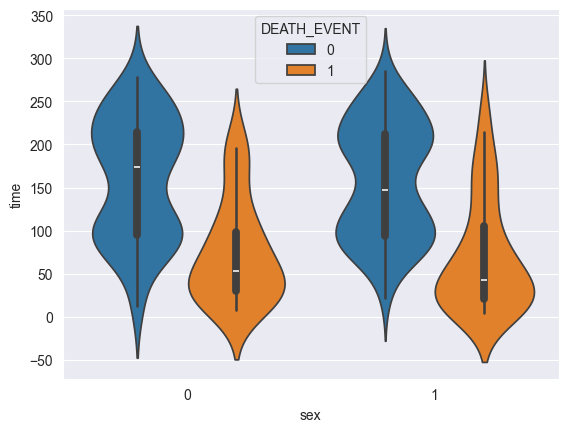

In [846]:
sns.violinplot(y=df['time'],x=df['sex'],hue='DEATH_EVENT',data=df)

<Axes: xlabel='smoking', ylabel='age'>

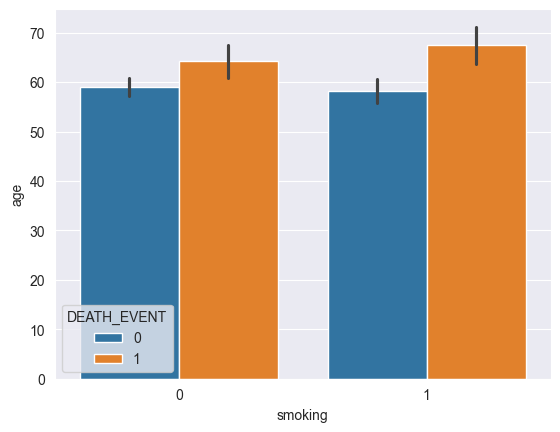

In [847]:
sns.barplot(x=df['smoking'],y=df['age'],hue='DEATH_EVENT',data=df)

In [848]:
df['DEATH_EVENT']

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

<Axes: xlabel='high_blood_pressure', ylabel='smoking'>

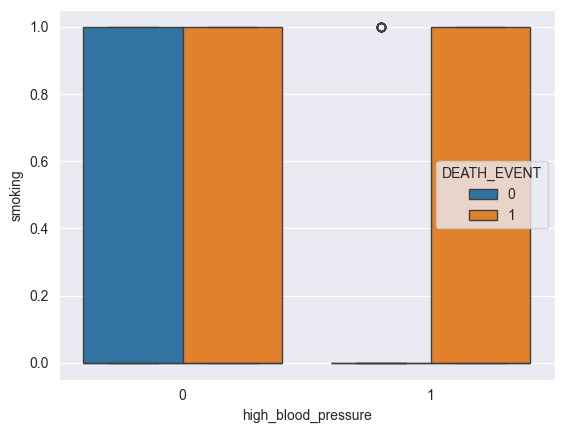

In [849]:
sns.boxplot(x=df['high_blood_pressure'],y=df['smoking'],hue='DEATH_EVENT',data=df)

In [850]:
df['smoking'].unique()

array([0, 1], dtype=int64)

In [851]:
print(df.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [852]:
df = df.sample(frac=1).reset_index(drop=True)

In [853]:
X = df.drop(["DEATH_EVENT","anaemia", "creatinine_phosphokinase","diabetes", "high_blood_pressure","platelets","sex","smoking"],axis = 1)
y = df['DEATH_EVENT']
X_resample, y_resample = SMOTE(random_state=42).fit_resample(X,y)

In [854]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size = 0.2, random_state=42)

# Train Model

In [865]:
base_models = {
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42,max_depth=None,min_samples_leaf=1,min_samples_split=2),
    "Logistic": LogisticRegression(max_iter=1000, random_state=42,C=0.1,penalty='l2',solver='liblinear'),
    "KNeighbors": KNeighborsClassifier(n_neighbors=9,algorithm='auto',weights='distance'),
    "DecisionTree": DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=1,min_samples_split=10,splitter='random'),
    "MLRClassifier": MLPClassifier(activation='tanh',alpha=0.0001,hidden_layer_sizes=300,max_iter=1000,random_state=42)
}

RandomForest Accuracy: 81.71%


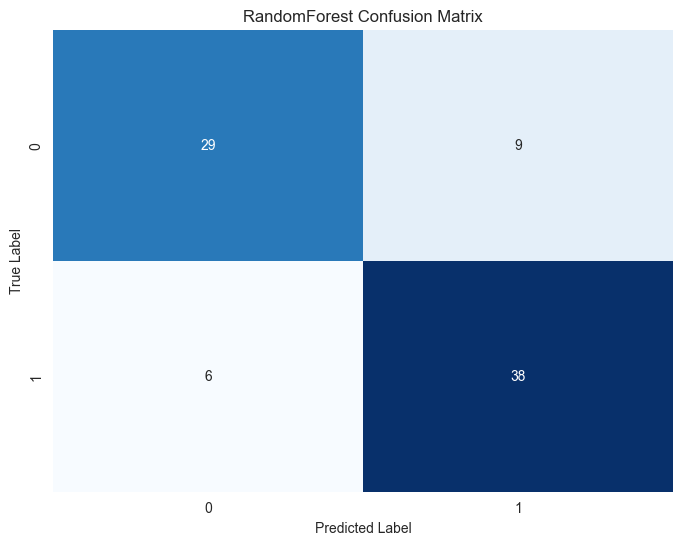

Logistic Accuracy: 79.27%


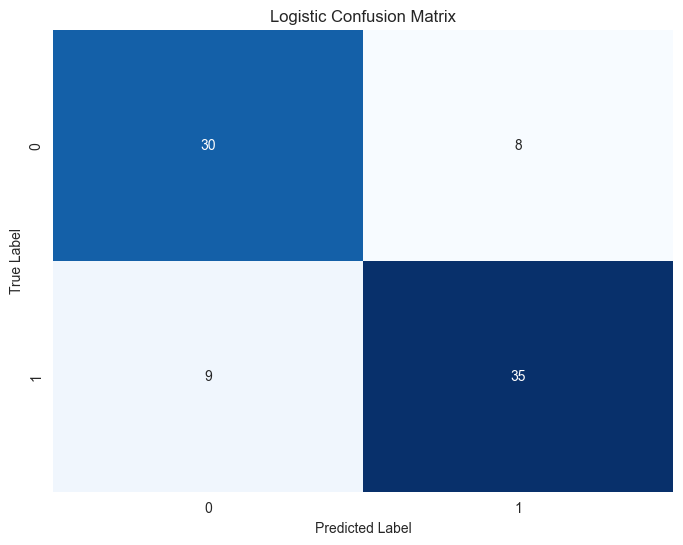

KNeighbors Accuracy: 84.15%


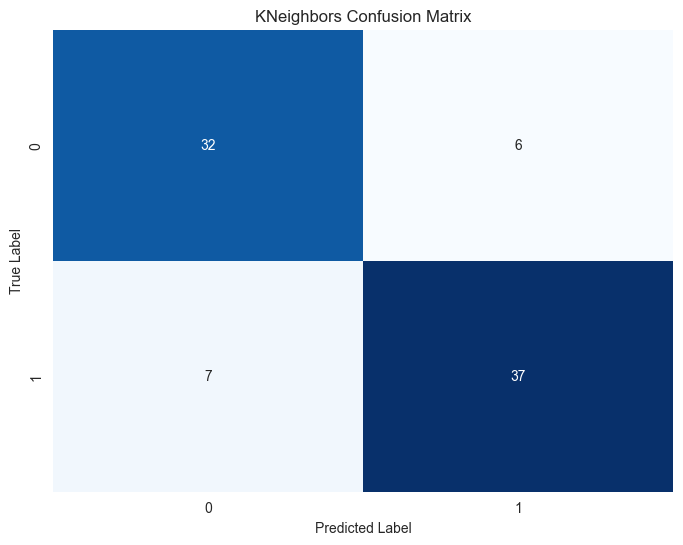

DecisionTree Accuracy: 79.27%


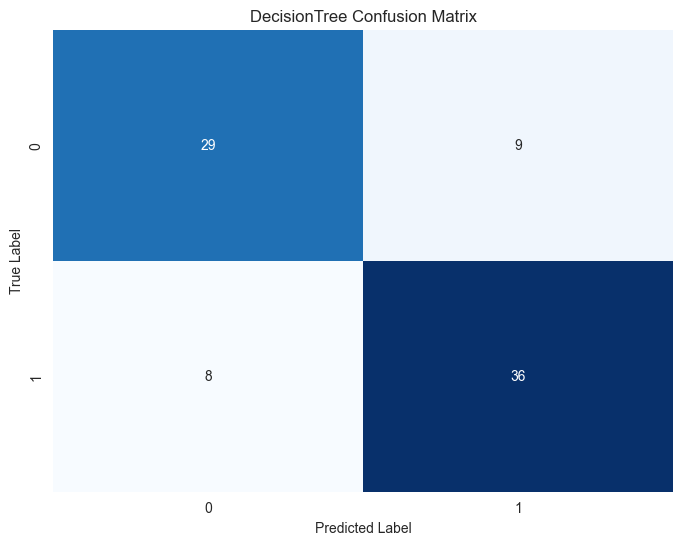

MLRClassifier Accuracy: 81.71%


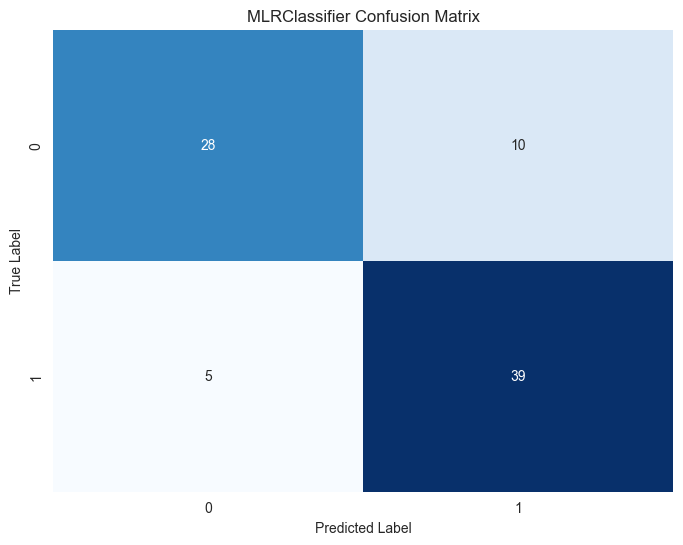

In [866]:

accuracies = {}

for name, model in base_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    cm = confusion_matrix(y_test, y_pred)
    file = open(f"{name}.pickle","wb")
    pickle.dump(model,file)
    file.close()
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [857]:
param_grids = {
    "RandomForest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Logistic": {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'saga']
    },
    "KNeighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    "DecisionTree": {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "MLRClassifier" : {
        'hidden_layer_sizes': [(50,), (150,), (250,), (300,)], 
        'activation': ['logistic', 'tanh', 'relu'], 
        'alpha': [0.0001, 0.001, 0.01], 
        'max_iter': [100, 500 , 1000] 
    }
    
}

# Perform GridSearchCV for each model
best_estimators = {}
for model_name, model in base_models.items():
    print(f"Performing grid search for {model_name}")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_}\n")

# Evaluate the best model of each type on the test set
for model_name, best_model in best_estimators.items():
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test set accuracy for {model_name}: {test_accuracy}")

Performing grid search for RandomForest
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation accuracy for RandomForest: 0.8949038461538461

Performing grid search for Logistic
Fitting 5 folds for each of 48 candidates, totalling 240 fits


E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
140 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\

Best parameters for Logistic: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic: 0.8053365384615384

Performing grid search for KNeighbors
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for KNeighbors: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation accuracy for KNeighbors: 0.8609615384615384

Performing grid search for SVC
Fitting 5 folds for each of 20 candidates, totalling 100 fits


E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameters for SVC: {'C': 100, 'max_iter': 500}
Best cross-validation accuracy for SVC: 0.8610576923076924

Performing grid search for DecisionTree
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for DecisionTree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation accuracy for DecisionTree: 0.8762980769230768

Performing grid search for MLRClassifier
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for MLRClassifier: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (300,), 'max_iter': 500}
Best cross-validation accuracy for MLRClassifier: 0.8825480769230769

Test set accuracy for RandomForest: 0.8170731707317073
Test set accuracy for Logistic: 0.7804878048780488
Test set accuracy for KNeighbors: 0.8414634146341463
Test set accuracy for SVC: 0.7439024390243902
Test set accuracy for DecisionTree: 0.8170731707317073
Test set accura

E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [858]:
rf = RandomForestClassifier(n_estimators=200, random_state=42,max_depth=None,min_samples_leaf=4,min_samples_split=10)
rf.fit(X_test,y_test)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [859]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
feature_names = [f"feature {i}" for i in range(X.shape[1])]

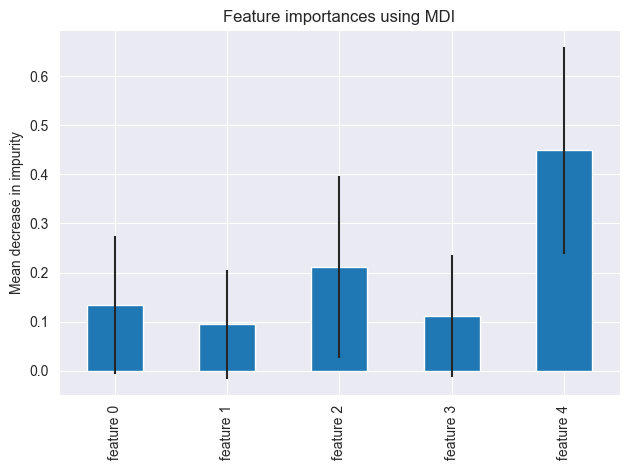

In [860]:

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [861]:
X['DEATH'] = y 

<Axes: >

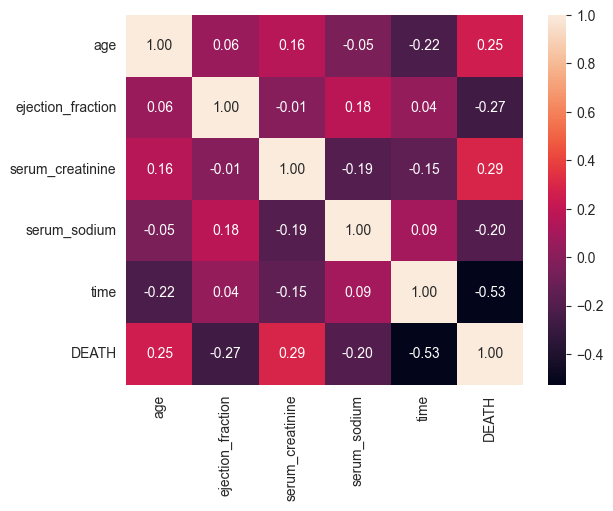

In [862]:
sns.heatmap(X.corr(), annot=True, fmt='.2f')#, cmap='coolwarm')